In [1]:
import pandas as pd
import pylab
from astropy.stats import LombScargle
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


In [2]:
#extracting data from dat file

path = 'data.xlsx'
df = pd.read_excel(path)
data = df.iloc[:,8].tolist()

avg_data = np.mean(data)

rel_diff = data - avg_data

year = df.iloc[:,2].tolist()

dy = 0.001


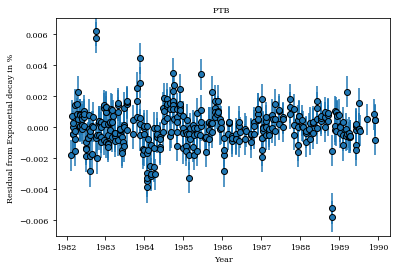

In [3]:
#plotting the above data 

plt.ylim(-0.007,0.007) 
plt.errorbar(year,rel_diff,dy,fmt='o')		
plt.title('BNL ')
plt.xlabel('Year')
plt.ylabel('Residual from Exponetial decay in %')
plt.show()

In [4]:
#Applying LombScargle Periodogram

ls = LombScargle(year, rel_diff, dy)
frequency, power = ls.autopower()

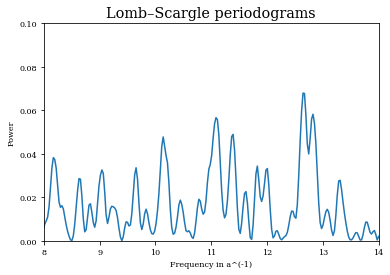

In [5]:
#plotting power vs frequency | xlim(8,14)

plt.xlim(8,14)
plt.ylim(0,0.1)
plt.plot(frequency, power) 
plt.style.use('ggplot')
plt.title('Lomb–Scargle periodograms')
plt.xlabel('Frequency in a^(-1)')
plt.ylabel('Power')
plt.show()

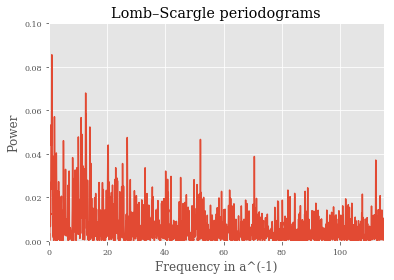

In [6]:
#plotting power vs frequency | xlim(0,115)

plt.xlim(0,115)
plt.ylim(0,0.1)
plt.plot(frequency, power) 
plt.style.use('ggplot')
plt.title('Lomb–Scargle periodograms')
plt.xlabel('Frequency in a^(-1)')
plt.ylabel('Power')
plt.show()

In [7]:
#Defining FAP to find significance of peaks 

def false_alarm(method):
	return ls.false_alarm_probability(z, method=method, maximum_frequency=5)


#peak detection

from scipy.signal import argrelextrema

# for local maxima
a = argrelextrema(power, np.greater)

# for local minima
b = argrelextrema(power, np.less)


In [11]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('BNL_FAP.xlsx') 
  
worksheet = workbook.add_worksheet() 
  

worksheet.write('A1', 'Power') 
worksheet.write('B1', 'Frequency') 
worksheet.write('C1', 'FAP : baluev') 
worksheet.write('D1', 'FAP : davies') 
worksheet.write('E1', 'FAP : naive') 
worksheet.write('F1', 'FAP : bootstrap') 


row = 1
col = 0
count = 0
sig = []
for i in range(len(a[0])): 
    worksheet.write(row, col, power[a[0][i]]) 
    worksheet.write(row, col + 1, frequency[a[0][i]]) 

    worksheet.write(row, col + 2, ls.false_alarm_probability(power[a[0][i]], method='baluev'))
    worksheet.write(row, col + 3, ls.false_alarm_probability(power[a[0][i]], method='davies'))
    worksheet.write(row, col + 4, ls.false_alarm_probability(power[a[0][i]], method='naive'))

    q = ls.false_alarm_probability(power[a[0][i]], method='bootstrap')
    worksheet.write(row, col + 5, q)
    if  q<0.1:
        count = count + 1
        print(count)
        worksheet.write(row, col + 6, q)
        sig.append(a[0][i])


    row += 1

workbook.close() 
print(sig)

1
2
3
4
5
